<a href="https://colab.research.google.com/github/AsmaaAlghamd1/Asmaa_INFO5731_-Spring2021/blob/main/Alghamdi__class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
!pip install pyLDAvis
!pip install spacy
!pip install --upgrade gensim

     |████████████████████████████████| 1.7MB 5.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=2bc2c9a3cb9118707d0c4b1a63afac71060768d451654c5dc1f6cd59df456d74
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis
     |████████████████████████████████| 24.2MB 52.8MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import nltk; 
nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import logging

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


import pandas as pd
df = pd.read_csv("/content/Title_list.csv")
df.head(100)

,Title
0,[PDF][PDF] How'big data'is different
1,Challenges and opportunities with big data
2,Big data: A review
3,Big data and management
4,From databases to big data
...,...
95,[HTML][HTML] The big challenges of big data
96,[PDF][PDF] Big data: the management revolution
97,[PDF][PDF] Big data in big companies
98,Challenges of big data analysis


In [ ]:
df["Title"]=df["Title"].str.lower()
data = df["Title"].values.tolist() 
data = [re.sub(" $","",sent) for sent in data]
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
print(data[:10])

['[pdf][pdf] howbig datais different', 'challenges and opportunities with big data', 'big data: a review', 'big data and management', 'from databases to big data', '[html][html] the big challenges of big data', '[pdf][pdf] big data: the management revolution', '[pdf][pdf] big data in big companies', 'challenges of big data analysis', 'data mining with big data']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:10])

[['pdf', 'pdf', 'howbig', 'datais', 'different'], ['challenges', 'and', 'opportunities', 'with', 'big', 'data'], ['big', 'data', 'review'], ['big', 'data', 'and', 'management'], ['from', 'databases', 'to', 'big', 'data'], ['html', 'html', 'the', 'big', 'challenges', 'of', 'big', 'data'], ['pdf', 'pdf', 'big', 'data', 'the', 'management', 'revolution'], ['pdf', 'pdf', 'big', 'data', 'in', 'big', 'companies'], ['challenges', 'of', 'big', 'data', 'analysis'], ['data', 'mining', 'with', 'big', 'data']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  


bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


print(trigram_mod[bigram_mod[data_words[0]]])

['pdf', 'pdf', 'howbig', 'datais', 'different']


In [ ]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words and form Bigrams
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Lemmatization keeping only NOUN,ADJ,VERB,ADV
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['different']]


In [ ]:
# Create Dictionary, corpus, tdf and view
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:10])

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1)], [(1, 1), (5, 1)], [(1, 1), (6, 1)], [(1, 1), (3, 1), (7, 1)], [(1, 2), (2, 1), (3, 1)], [(8, 1)], [(1, 2), (3, 1), (9, 1)], [(1, 1), (2, 1), (3, 1), (10, 1)], [(1, 1), (3, 2), (11, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]


[[('different', 1)],
 [('big', 1), ('challenge', 1), ('datum', 1), ('opportunitie', 1)],
 [('big', 1), ('review', 1)],
 [('big', 1), ('management', 1)],
 [('big', 1), ('datum', 1), ('database', 1)],
 [('big', 2), ('challenge', 1), ('datum', 1)],
 [('revolution', 1)],
 [('big', 2), ('datum', 1), ('company', 1)],
 [('big', 1), ('challenge', 1), ('datum', 1), ('analysis', 1)],
 [('big', 1), ('datum', 2), ('mine', 1)],
 [('different', 1)],
 [('big', 1), ('challenge', 1), ('datum', 1), ('opportunitie', 1)],
 [('big', 1), ('review', 1)],
 [('big', 1), ('management', 1)],
 [('big', 1), ('datum', 1), ('database', 1)],
 [('big', 2), ('challenge', 1), ('datum', 1)],
 [('revolution', 1)],
 [('big', 2), ('datum', 1), ('company', 1)],
 [('big', 1), ('challenge', 1), ('datum', 1), ('analysis', 1)],
 [('big', 1), ('datum', 2), ('mine', 1)],
 [('different', 1)],
 [('big', 1), ('challenge', 1), ('datum', 1), ('opportunitie', 1)],
 [('big', 1), ('review', 1)],
 [('big', 1), ('management', 1)],
 [('big',

In [ ]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.370*"big" + 0.248*"datum" + 0.247*"challenge" + 0.125*"opportunitie" + '
  '0.001*"revolution" + 0.001*"database" + 0.001*"analysis" + '
  '0.001*"different" + 0.001*"review" + 0.001*"management"'),
 (1,
  '0.325*"big" + 0.322*"datum" + 0.315*"database" + 0.008*"challenge" + '
  '0.005*"analysis" + 0.004*"revolution" + 0.004*"company" + 0.004*"mine" + '
  '0.004*"management" + 0.004*"different"'),
 (2,
  '0.106*"datum" + 0.099*"big" + 0.093*"database" + 0.083*"different" + '
  '0.083*"mine" + 0.077*"revolution" + 0.077*"challenge" + 0.077*"management" '
  '+ 0.077*"review" + 0.077*"analysis"'),
 (3,
  '0.487*"big" + 0.245*"datum" + 0.244*"company" + 0.003*"opportunitie" + '
  '0.003*"challenge" + 0.003*"management" + 0.003*"mine" + 0.003*"review" + '
  '0.002*"different" + 0.002*"revolution"'),
 (4,
  '0.245*"datum" + 0.245*"big" + 0.245*"challenge" + 0.245*"analysis" + '
  '0.003*"mine" + 0.003*"opportunitie" + 0.002*"revolution" + '
  '0.002*"different" + 0.002*"review" + 0

In [ ]:
#perplexity and coherence
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -2.3506536249456733

Coherence Score:  0.6358211005797478


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.168232  0.004024       1        1  25.918187
3      0.173058  0.005804       2        1  13.626161
8      0.165267  0.008179       3        1  13.522121
4      0.134703  0.001528       4        1  13.493416
6      0.069955 -0.004216       5        1  12.624689
1      0.149648  0.003934       6        1  10.472330
9     -0.317787 -0.291094       7        1   3.910581
7     -0.348740  0.276995       8        1   3.786259
2     -0.087649  0.000559       9        1   1.341328
5     -0.106686 -0.005712      10        1   1.304929, topic_info=          Term       Freq      Total Category  logprob  loglift
8   revolution  11.000000  11.000000  Default  12.0000  12.0000
0    different  11.000000  11.000000  Default  11.0000  11.0000
2    challenge  29.000000  29.000000  Default  10.0000  10.0000
3        datum  67.000000  67.000000  Default   9.0000   9.0000
7     database  10.000000  10.000000  Default   8.0000   8.0000
..         ...        ...        ...      ...      ...      ...
0    different   0.315361  11.226785  Topic10  -2.4849   0.7667
8   revolution   0.315361  11.349280  Topic10  -2.4849   0.7558
2    challenge   0.315357  29.556490  Topic10  -2.4849  -0.2013
3        datum   0.315363  67.836659  Topic10  -2.4849  -1.0321
1          big   0.315374  94.989390  Topic10  -2.4849  -1.3687

[132 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
10        4  0.915190      analysis
1         1  0.294770           big
1         2  0.200022           big
1         3  0.105275           big
1         4  0.105275           big
1         5  0.189495           big
1         6  0.105275           big
2         1  0.642837     challenge
2         4  0.338335     challenge
9         2  0.913671       company
7         6  0.913719      database
3         1  0.280085         datum
3         2  0.147413         datum
3         3  0.280085         datum
3         4  0.147413         datum
3         6  0.147413         datum
0         8  0.890727     different
6         5  0.874270    management
11        3  0.913560          mine
4         1  0.841918  opportunitie
5         5  0.874195        review
8         7  0.881113    revolution, R=12, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 9, 5, 7, 2, 10, 8, 3, 6])

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip "/content/mallet-2.0.8.zip"

--2021-03-20 03:53:10--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.5’

mallet-2.0.8.zip.5  100%[===================>]  15.43M  5.63MB/s    in 2.7s    

2021-03-20 03:53:13 (5.63 MB/s) - ‘mallet-2.0.8.zip.5’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os       #importing os to set variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null   
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"    
  !java -version       
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [ ]:
mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [ ]:
pprint(ldamallet.show_topics(formatted=False))
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('challenge', 1.0),
   ('database', 0.0),
   ('review', 0.0),
   ('analysis', 0.0),
   ('company', 0.0),
   ('revolution', 0.0),
   ('different', 0.0),
   ('datum', 0.0),
   ('opportunitie', 0.0),
   ('management', 0.0)]),
 (1,
  [('big', 0.6296296296296297),
   ('management', 0.37037037037037035),
   ('review', 0.0),
   ('analysis', 0.0),
   ('company', 0.0),
   ('revolution', 0.0),
   ('different', 0.0),
   ('database', 0.0),
   ('datum', 0.0),
   ('opportunitie', 0.0)]),
 (2,
  [('big', 0.6),
   ('analysis', 0.4),
   ('database', 0.0),
   ('review', 0.0),
   ('company', 0.0),
   ('revolution', 0.0),
   ('different', 0.0),
   ('challenge', 0.0),
   ('datum', 0.0),
   ('management', 0.0)]),
 (3,
  [('big', 1.0),
   ('database', 0.0),
   ('review', 0.0),
   ('analysis', 0.0),
   ('company', 0.0),
   ('revolution', 0.0),
   ('different', 0.0),
   ('challenge', 0.0),
   ('datum', 0.0),
   ('management', 0.0)]),
 (4,
  [('big', 0.6551724137931034),
   ('company', 0.344827586206896

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

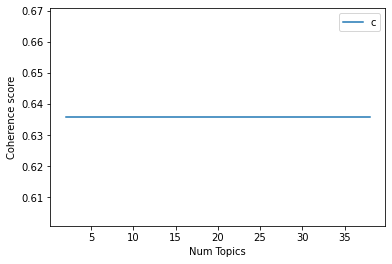

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6358
Num Topics = 8  has Coherence Value of 0.6358
Num Topics = 14  has Coherence Value of 0.6358
Num Topics = 20  has Coherence Value of 0.6358
Num Topics = 26  has Coherence Value of 0.6358
Num Topics = 32  has Coherence Value of 0.6358
Num Topics = 38  has Coherence Value of 0.6358


In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '1.000*"datum" + 0.000*"database" + 0.000*"review" + 0.000*"analysis" + '
  '0.000*"company" + 0.000*"revolution" + 0.000*"different" + '
  '0.000*"challenge" + 0.000*"opportunitie" + 0.000*"management"'),
 (1,
  '0.538*"datum" + 0.462*"big" + 0.000*"revolution" + 0.000*"review" + '
  '0.000*"analysis" + 0.000*"company" + 0.000*"different" + 0.000*"database" + '
  '0.000*"opportunitie" + 0.000*"management"'),
 (2,
  '0.818*"company" + 0.182*"opportunitie" + 0.000*"database" + 0.000*"review" '
  '+ 0.000*"analysis" + 0.000*"revolution" + 0.000*"different" + '
  '0.000*"challenge" + 0.000*"datum" + 0.000*"management"'),
 (3,
  '0.667*"analysis" + 0.333*"challenge" + 0.000*"database" + 0.000*"review" + '
  '0.000*"company" + 0.000*"revolution" + 0.000*"different" + 0.000*"datum" + '
  '0.000*"opportunitie" + 0.000*"management"'),
 (4,
  '0.500*"mine" + 0.500*"big" + 0.000*"database" + 0.000*"analysis" + '
  '0.000*"company" + 0.000*"revolution" + 0.000*"different" + '
  '0.000*"cha

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0500,"datum, database, review, analysis, company, re...",[pdf][pdf] howbig datais different
1,1,16.0,0.0648,"datum, opportunitie, revolution, review, analy...",challenges and opportunities with big data
2,2,8.0,0.0673,"review, database, analysis, company, revolutio...",big data: a review
3,3,18.0,0.0673,"management, mine, analysis, company, revolutio...",big data and management
4,4,11.0,0.0660,"database, review, analysis, company, revolutio...",from databases to big data
...,...,...,...,...,...
95,95,10.0,0.0566,"big, challenge, revolution, review, analysis, ...",[html][html] the big challenges of big data
96,96,9.0,0.0686,"revolution, company, database, review, analysi...",[pdf][pdf] big data: the management revolution
97,97,2.0,0.0628,"company, opportunitie, database, review, analy...",[pdf][pdf] big data in big companies
98,98,3.0,0.0648,"analysis, challenge, database, review, company...",challenges of big data analysis


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords","Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0607,"datum, database, review, analysis, company, re...",[html][html] the big challenges of big data
1,2.0,0.0648,"company, opportunitie, database, review, analy...",[pdf][pdf] big data in big companies
2,3.0,0.0710,"analysis, challenge, database, review, company...",challenges of big data analysis
3,4.0,0.0710,"mine, big, database, analysis, company, revolu...",data mining with big data
4,5.0,0.0586,"big, database, review, analysis, company, revo...",[html][html] the big challenges of big data


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"datum, database, review, analysis, company, re...",11.0,0.11
1.0,16.0,"datum, opportunitie, revolution, review, analy...",NaN,NaN
2.0,8.0,"review, database, analysis, company, revolutio...",12.0,0.12
3.0,18.0,"management, mine, analysis, company, revolutio...",10.0,0.10
4.0,11.0,"database, review, analysis, company, revolutio...",9.0,0.09
...,...,...,...,...
95.0,10.0,"big, challenge, revolution, review, analysis, ...",NaN,NaN
96.0,9.0,"revolution, company, database, review, analysi...",NaN,NaN
97.0,2.0,"company, opportunitie, database, review, analy...",NaN,NaN
98.0,3.0,"analysis, challenge, database, review, company...",NaN,NaN


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



In [ ]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles


In [ ]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """

    dictionary = corpora.Dictionary(doc_clean)
   
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:


number_of_topics=7
words=10
document_list,titles=load_data("","/content/Title_list.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 101
[(0, '0.662*"big" + 0.569*"data" + 0.408*"pdf" + 0.148*"challeng" + 0.132*"html" + 0.102*"manag" + 0.080*"compani" + 0.063*"revolut" + 0.060*"differ" + 0.053*"mine"'), (1, '-0.780*"pdf" + 0.336*"challeng" + 0.329*"html" + 0.211*"data" + 0.194*"big" + -0.146*"revolut" + -0.133*"differ" + -0.116*"manag" + -0.111*"compani" + 0.085*"opportun"'), (2, '-0.656*"html" + 0.533*"data" + 0.283*"mine" + -0.261*"challeng" + -0.239*"pdf" + -0.165*"big" + 0.119*"manag" + 0.116*"databas" + 0.116*"review" + -0.087*"compani"'), (3, '-0.648*"manag" + -0.370*"html" + -0.349*"revolut" + 0.308*"challeng" + 0.247*"opportun" + 0.247*"analysi" + 0.219*"compani" + 0.190*"differ" + 0.120*"pdf" + -0.048*"mine"'), (4, '-0.551*"challeng" + -0.410*"manag" + -0.331*"opportun" + -0.331*"analysi" + -0.303*"revolut" + 0.223*"html" + 0.208*"compani" + 0.191*"mine" + 0.166*"review" + 0.166*"databas"'), (5, '-0.460*"differ" + 0.398*"compani" + -0.390*"mine" + 0.370*"big" + -0.298*"html" + -0.

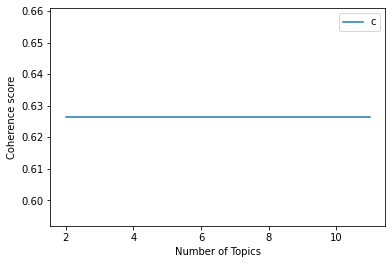

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [ ]:
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.674*"big" + 0.570*"data" + 0.363*"pdf" + 0.169*"challeng" + 0.153*"html" + 0.112*"manag" + 0.087*"compani" + 0.069*"revolut" + 0.060*"mine" + 0.047*"analysi"'), (1, '0.815*"pdf" + -0.232*"data" + -0.226*"challeng" + -0.213*"html" + 0.188*"howbig" + 0.188*"datai" + 0.188*"differ" + -0.181*"big" + 0.123*"revolut" + 0.097*"compani"'), (2, '0.685*"html" + -0.440*"data" + 0.374*"challeng" + -0.216*"mine" + -0.205*"manag" + 0.138*"datai" + 0.138*"howbig" + 0.138*"differ" + 0.122*"big" + 0.105*"pdf"'), (3, '-0.362*"differ" + -0.362*"datai" + -0.362*"howbig" + 0.341*"manag" + -0.314*"challeng" + -0.263*"data" + 0.250*"html" + 0.235*"revolut" + -0.219*"analysi" + -0.219*"opportun"'), (4, '-0.510*"manag" + -0.481*"challeng" + -0.355*"revolut" + 0.277*"compani" + -0.273*"analysi" + -0.273*"opportun" + 0.192*"mine" + 0.175*"databas" + 0.175*"review" + 0.168*"big"'), (5, '0.442*"html" + -0.424*"compani" + 0.359*"manag" + 0.256*"mine" + -0.239*"challeng" + 0.236*"data" + -0.230*"analysi" + -

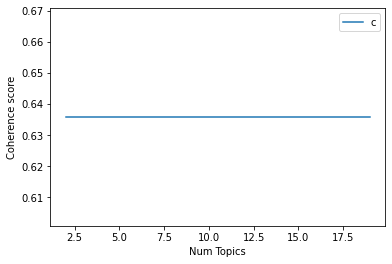

In [ ]:
from gensim.models import LsiModel
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

lsa_model_list, lsa_coherence_values = compute_lsa_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=1)


# Graph of Coherence Score against Number of Topics 
start=2; limit=20; step=1;
x = range(start, limit, step)
plt.plot(x, lsa_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lsamodel = LsiModel(corpus=corpus, id2word=id2word, num_topics=2)

# EXAMINING THE RESULTS

from pprint import pprint
print('The topics using LSA Model are:')
pprint(lsamodel.print_topics())

# Compute Coherence Score
coherence_model_lsa = CoherenceModel(model=lsamodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score:', coherence_lsa)

The topics using LSA Model are:
[(0,
  '-0.757*"big" + -0.577*"datum" + -0.246*"challenge" + -0.095*"company" + '
  '-0.087*"mine" + -0.072*"analysis" + -0.072*"opportunitie" + '
  '-0.061*"database" + -0.035*"review" + -0.035*"management"'),
 (1,
  '-0.644*"datum" + 0.522*"big" + -0.365*"mine" + 0.249*"review" + '
  '0.249*"management" + 0.191*"company" + -0.081*"analysis" + '
  '-0.081*"opportunitie" + -0.058*"database" + -0.047*"challenge"')]
Coherence Score: 0.6358211005797478


## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

Topic modeling provides us with valuable ways to accomplish document clustering, textual data organizing,  feature selection understanding.
And summarize huge collections of textual information.

LDA is a technique used to obtain topic models. It's objective modeling to generate words based on their probability distribution and explain why some data parts are similar. The process of the LDA model depends on creating the dictionary and the Collection of topic numbers. 
On the other hand, LSA is a second technique used to obtain topics models in this assignment. LSA performs a topic document matrix analysis on documents and terms. LSA  focuses on a dimensional reduction technology. It depends on a subject-related scale, which is a realistic measure of the number of subjects.
From the above results, In my opinion, the LDA gives better and more understandable results with more topics than LSA. 